## Lab 1

## CIFAR - 10 dataset

##### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

##### The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

##### Here are the classes in the dataset:
#### airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

##### The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.datasets import cifar10

## Loading train and test dataset

In [2]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data() 
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

## Normalization - scale pixels

In [3]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

## Define the model

In [4]:
def define_model():
    model = Sequential()
    
    #Hidden layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    
    #Hidden Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    
    #Hidden Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    # Output layer
    model.add(Dense(10, activation='softmax'))
              
    # Compile the model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Display the model summary
    model.summary()
    return model
    

## Evaluation

In [6]:
# run the test harness for evaluating a model
def run_test_harness():
    
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    
    # define model
    model = define_model()
    
    # fit model
    model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
    
    # save model
    model.save(r"C:\Users\gayat\Applied ML codes\final_model_cifar.h5")
run_test_harness()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

C:\Users\gayat\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

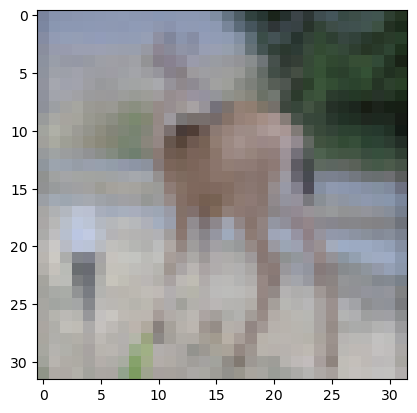

1/1 [==============================] - 0s 258ms/step
Predicted class is :  deer


In [7]:
# make a prediction for a new image

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
    #load the image
    img = load_img(filename, color_mode='rgb', target_size=(32, 32))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 32, 32, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

img1 = mpimg.imread(r"C:\Users\gayat\Applied ML codes\sample_32_32_rbg.png")
imgplot = plt.imshow(img1)
plt.show()
img = load_image(r"C:\Users\gayat\Applied ML codes\sample_32_32_rbg.png")
model = load_model(r"C:\Users\gayat\Applied ML codes\final_model_cifar.h5")

# predict the class
prediction = model.predict(img)
predicted_class = np.argmax(prediction)
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print("Predicted class is : ", class_names[predicted_class])